# Digit Recognizer
Ilan Valencius

## Load Data


In [11]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import keras
import matplotlib.pyplot as plt
from math import log, exp
import itertools
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

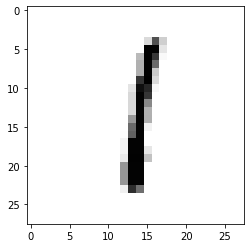

In [38]:
# Load CSV data
x_data = np.genfromtxt('handwritten_digits_images.csv', delimiter=',')
y_data = np.genfromtxt('handwritten_digits_labels.csv', delimiter=',')\


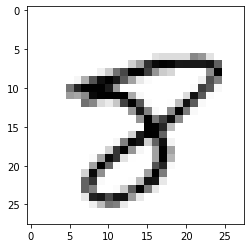

In [43]:
# Reshape images into 28 x 28 images
# x_data = x_data.reshape(x_data.shape[0], 28, 28)

# Plot image for quick sanity check
plt.imshow(x_data.reshape(x_data.shape[0], 28, 28)[60000], cmap='Greys')

## Create train, validation, test sets

In [44]:
seed = 120

x_train_val, x_test, y_train_val, y_test = train_test_split(x_data,
                                                            y_data,
                                                            test_size=0.2,
                                                            random_state=seed,
                                                            shuffle=True)

x_train, x_val, y_train, y_val = train_test_split(x_train_val,
                                                  y_train_val,
                                                  test_size=0.3,
                                                  random_state=seed, 
                                                  shuffle=True)

# Variables for model parameters
y_classes = len(np.unique(y_data))

## Model 1 - MLP

In [49]:
def construct_MLP(input_shape, num_layers=10, activation='relu'):
    # Create model
    MLP = Sequential()
    MLP.add(layers.InputLayer(input_shape=input_shape))
    # Intermediate Layers
    for i in range(num_layers):
        MLP.add(layers.Dense(32, activation=activation))
    # Output layer (fully-connected):
    MLP.add(layers.Dense(y_classes, activation='softmax'))
    # Compile Model
    MLP.compile(optimizer='adam',
                loss=categorical_crossentropy,
                metrics=['accuracy'])
    return MLP
            

Test MLP Model

In [51]:
y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)

batch_sz = 16
MLP_test = construct_MLP(input_shape=784 ,num_layers=5)
MLP_test.summary()

training_history = MLP_test.fit(x=x_train,y=y_train_one_hot,
                                batch_size=16,
                                epochs=2,
                                validation_data=(x_val,y_val_one_hot),
                                use_multiprocessing=True,)
# USE EARLUUY CHECKING

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_102 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_103 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_104 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_105 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_106 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_107 (Dense)            (None, 32)              